# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
* Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create training dataset
train_points = 1000
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 200

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

plot del dataset di train

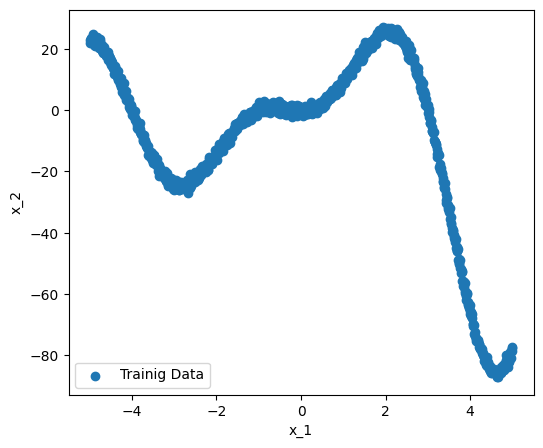

In [4]:
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, label='Trainig Data')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()

### Linear Ridge Regression
regressione lineare con regloarizzazione Ridge, si nota che la retta trovata non interpola bene i dati e l'errore è molto elevato, questo perché il dataset è generato da una funzione non lineare

test set RMSE for Ridge regression: 26.781209141439653


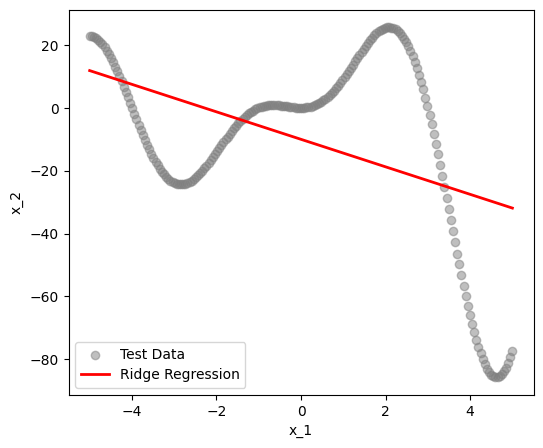

In [7]:
from sklearn.linear_model import Ridge
from sklearn import metrics

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(f"test set RMSE for Ridge regression: {metrics.root_mean_squared_error(y_test, ridge_pred)}" )

plt.figure(figsize=(6, 5))
plt.scatter(X_test, y_test, label='Test Data', color='gray', alpha=0.5)
plt.plot(np.linspace(-5, 5, test_points), ridge.coef_* X_test + ridge.intercept_, c='red', lw=2, label='Ridge Regression')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()

### Gaussian Kernel
con in kernel gaussiano i dati vengono interpolati quasi perfettamente, e la radice quadrata dell'errore quadratico medio è molto basso

In [8]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.kernel_ridge import KernelRidge

def eval_kernel_rbf(param_grid_rbf):
    krr_rbf = KernelRidge(kernel='rbf')
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    grid_search_rbf = GridSearchCV(
        estimator=krr_rbf,
        param_grid=param_grid_rbf,
        scoring='neg_root_mean_squared_error',
        cv=kfold,
    )
    grid_search_rbf.fit(X_train, y_train)
    print(f"Best parameters rbf: {grid_search_rbf.best_params_}")

    RMSE_rbf = []
    predictions_rbf = []
    for gamma in param_grid_rbf['gamma']:
        krr_rbf = KernelRidge(kernel='rbf', alpha=0.1, gamma=gamma).fit(X_train, y_train)
        krr_rbf_pred = krr_rbf.predict(X_test)
        rmse = metrics.root_mean_squared_error(y_test, krr_rbf_pred)
        print(f"test set RMSE for gassian kernel with gamma={gamma}: {rmse}")
        RMSE_rbf.append(rmse)
        predictions_rbf.append(krr_rbf_pred)
        
    return RMSE_rbf, predictions_rbf

Best parameters rbf: {'alpha': 0.1, 'gamma': 0.8}
test set RMSE for gassian kernel with gamma=0.001: 23.374385209981536
test set RMSE for gassian kernel with gamma=0.01: 9.81762882270455
test set RMSE for gassian kernel with gamma=0.1: 2.401062907965475
test set RMSE for gassian kernel with gamma=0.8: 0.12704493158797714
test set RMSE for gassian kernel with gamma=1: 0.13059164418218128
test set RMSE for gassian kernel with gamma=2: 0.1652025035282482
test set RMSE for gassian kernel with gamma=5: 0.22479101094402715
test set RMSE for gassian kernel with gamma=10: 0.2876580125483495


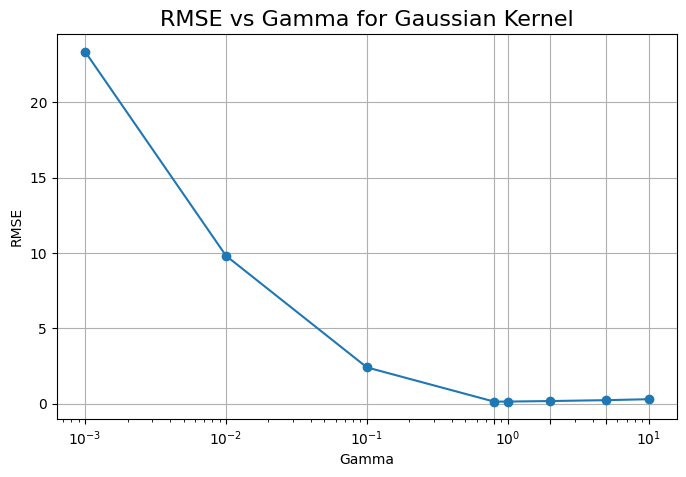

In [9]:
param_grid_rbf = {
        'alpha': [0.1],
        'gamma': [0.001, 0.01, 0.1, 0.8, 1, 2, 5, 10]
    }
RMSE_rbf, predictions_rbf = eval_kernel_rbf(param_grid_rbf)

plt.figure(figsize=(8, 5))
plt.plot(param_grid_rbf['gamma'], RMSE_rbf, marker='o')
plt.xscale('log')
plt.xticks(param_grid_rbf['gamma'])
plt.grid()
plt.xlabel('Gamma')
plt.ylabel('RMSE')
plt.title('RMSE vs Gamma for Gaussian Kernel', fontsize=16)
plt.show()

Best parameters rbf: {'alpha': 0.1, 'gamma': 0.8}
test set RMSE for gassian kernel with gamma=0.01: 9.81762882270455
test set RMSE for gassian kernel with gamma=0.1: 2.401062907965475
test set RMSE for gassian kernel with gamma=0.8: 0.12704493158797714


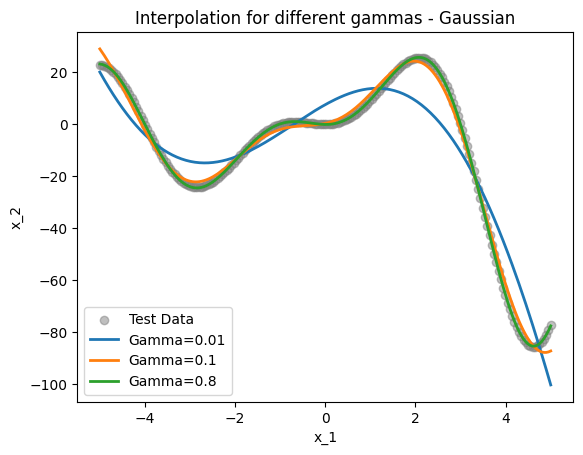

In [10]:
param_grid_rbf = {
        'alpha': [0.1],
        'gamma': [0.01, 0.1, 0.8],
    }
RMSE_rbf, predictions_rbf = eval_kernel_rbf(param_grid_rbf)

plt.scatter(X_test, y_test, label='Test Data', color='gray', alpha=0.5)
for index, gamma in enumerate(param_grid_rbf['gamma']):
    plt.plot(X_test, predictions_rbf[index], label=f'Gamma={gamma}', lw=2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.title('Interpolation for different gammas - Gaussian')
plt.show()

best model gaussian kernel

test set RMSE for gaussian Kernel: 0.12704493158797714


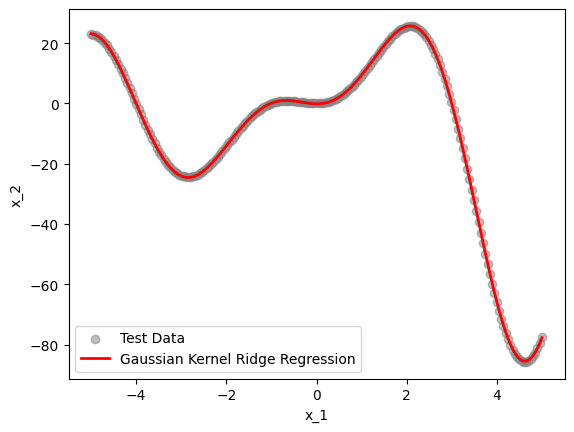

In [11]:
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.8).fit(X_train, y_train)
kr_pred = kr.predict(X_test)
print(f"test set RMSE for gaussian Kernel: {metrics.root_mean_squared_error(y_test, kr_pred)}")

plt.scatter(X_test, y_test, label='Test Data', color='gray', alpha=0.5)
plt.plot(np.linspace(-5, 5, test_points), kr_pred, c='red', lw=2, label='Gaussian Kernel Ridge Regression')
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

### Polynomial Kernel
utilizzando un kernel polinomiale si nota un miglioramento rispetto alla ridge regression senza kernel trick, ma i risultati ottenuti sono peggiori rispetto al kernel gaussiano, per la sua capacità di interpolare anche le funzioni periodiche e trigonometriche come il coseno

In [12]:
def eval_kernel_poly(param_grid_poly):
    krr_poly = KernelRidge(kernel='poly')
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    grid_search_poly = GridSearchCV(
        estimator=krr_poly,
        param_grid=param_grid_poly,
        scoring='neg_root_mean_squared_error',
        cv=kfold,
    )
    grid_search_poly.fit(X_train, y_train)
    print(f"Best parameters poly: {grid_search_poly.best_params_}")

    RMSE_poly = []
    predictions_poly = []
    for degree in param_grid_poly['degree']:
        krr_poly = KernelRidge(kernel='poly', alpha=0.1, degree=degree, gamma=10).fit(X_train, y_train)
        krr_poly_pred = krr_poly.predict(X_test)
        rmse = metrics.root_mean_squared_error(y_test, krr_poly_pred)
        print(f"test set RMSE for polynomial kernel with degree={degree}: {rmse}")
        RMSE_poly.append(rmse)
        predictions_poly.append(krr_poly_pred)
    return RMSE_poly, predictions_poly

/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.06672e-16): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.10892e-16): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.08699e-16): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2

Best parameters poly: {'alpha': 0.1, 'degree': 10, 'gamma': 1}
test set RMSE for polynomial kernel with degree=2: 22.294397728681208
test set RMSE for polynomial kernel with degree=3: 9.336730295046937
test set RMSE for polynomial kernel with degree=4: 9.18989499967305
test set RMSE for polynomial kernel with degree=5: 8.411044653223849


/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


test set RMSE for polynomial kernel with degree=6: 6.725085181592819


/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


test set RMSE for polynomial kernel with degree=7: 3.2913995090423356
test set RMSE for polynomial kernel with degree=8: 3.6083418634634206


/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


test set RMSE for polynomial kernel with degree=9: 4.300665847815972


/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


test set RMSE for polynomial kernel with degree=10: 9.449818888855713


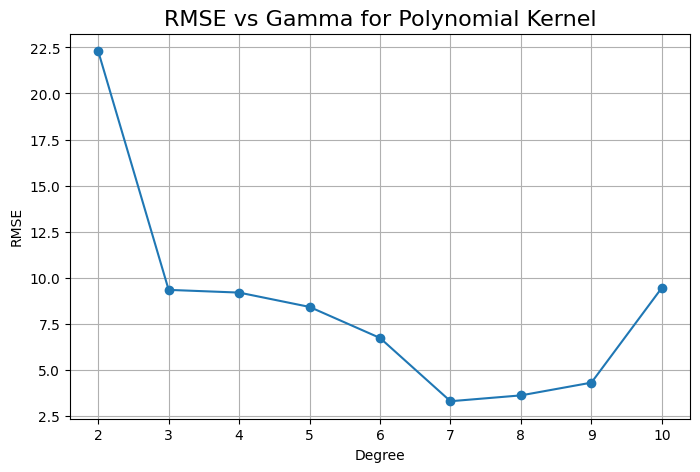

In [13]:
param_grid_poly = {
    'alpha': [0.1],
    'gamma': [1],
    'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
RMSE_poly, predictions_poly = eval_kernel_poly(param_grid_poly)

plt.figure(figsize=(8, 5))
plt.plot(param_grid_poly['degree'], RMSE_poly, marker='o')
plt.xticks(param_grid_poly['degree'])
plt.grid()
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Gamma for Polynomial Kernel', fontsize=16)
plt.show()

/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix 

Best parameters poly: {'alpha': 0.1, 'degree': 10, 'gamma': 1}


/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


test set RMSE for polynomial kernel with degree=6: 6.725085181592819


/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


test set RMSE for polynomial kernel with degree=7: 3.2913995090423356


/Users/admin/Documents/UNI/Corsi/ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


test set RMSE for polynomial kernel with degree=10: 9.449818888855713


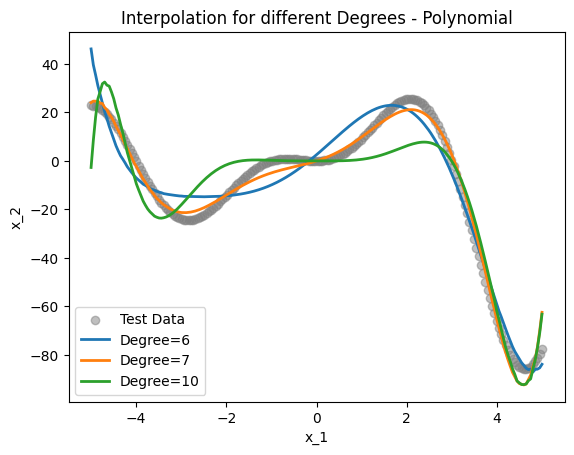

In [14]:
param_grid_poly = {
    'alpha': [0.1],
    'gamma': [1],
    'degree':[6, 7, 10],
}
RMSE_poly, predictions_poly = eval_kernel_poly(param_grid_poly)

plt.scatter(X_test, y_test, label='Test Data', color='gray', alpha=0.5)
for index, degree in enumerate(param_grid_poly['degree']):
    plt.plot(X_test, predictions_poly[index], label=f'Degree={degree}', lw=2)
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Interpolation for different Degrees - Polynomial')
plt.show()

best model polinomial kernel

test set RMSE for polynomial Kernel: 3.091201145633814


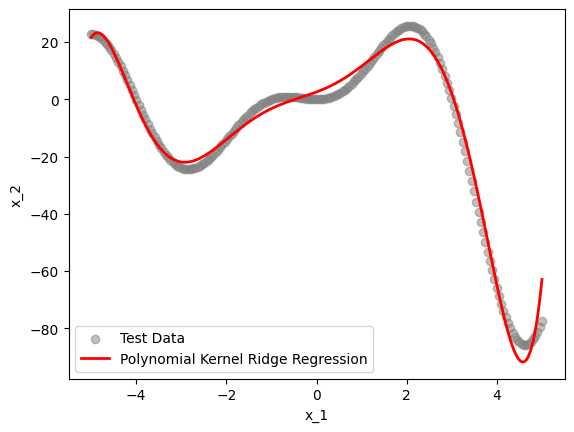

In [15]:
kp = KernelRidge(kernel='poly', alpha=0.1, degree=7, gamma=1).fit(X_train, y_train)
kp_pred = kp.predict(X_test)
print(f"test set RMSE for polynomial Kernel: {metrics.root_mean_squared_error(y_test, kp_pred)}")

plt.scatter(X_test, y_test, label='Test Data', color='gray', alpha=0.5)
plt.plot(np.linspace(-5, 5, test_points), kp_pred, c='red', lw=2, label='Polynomial Kernel Ridge Regression')
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [16]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

dimensione train set: 750
dimensione test set: 250


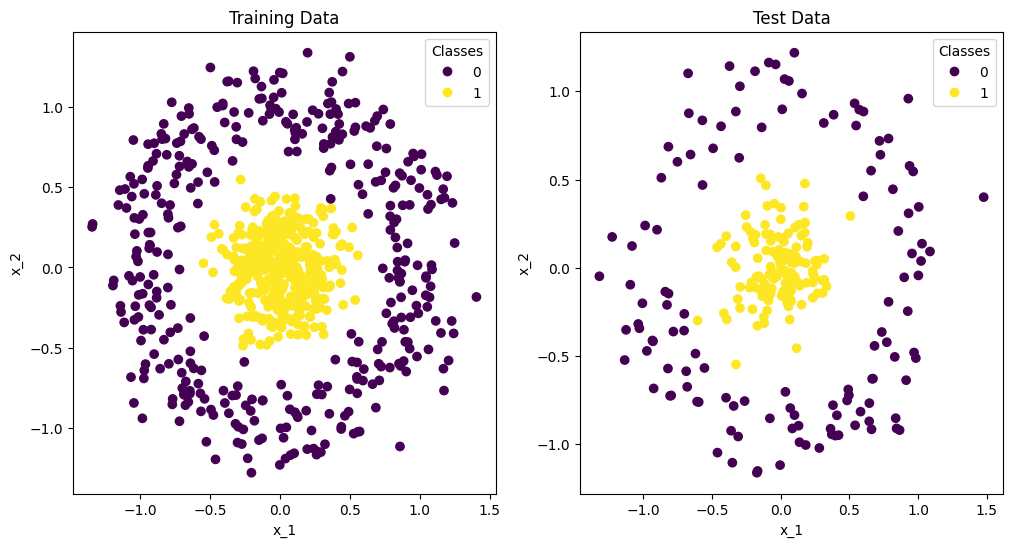

In [17]:
print(f"dimensione train set: {len(X_train)}")
print(f"dimensione test set: {len(X_test)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
scatter1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax1.set_xlabel('x_1')
ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.set_ylabel('x_2')
ax1.set_title('Training Data')
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
ax2.set_title('Test Data')
ax2.set_xlabel('x_1')
ax2.set_ylabel('x_2')
ax2.legend(*scatter2.legend_elements(), title="Classes")
plt.show()

### linear kernel PCA

con un modello PCA si vede che le componenti principali non differiscono molto dalle 2 variabili originali. di conseguenza la classificazione attraverso SMV ha un'accuratezza bassa

In [18]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

def pca_comparison_plot():
    fig, ax = plt.subplots(figsize=(8, 7))
    
    # PCA
    pca = PCA(n_components=2)
    pca.fit(X_train)
    projection_train = pca.transform(X_train)
    projection_test = pca.transform(X_test)
    
    # SMV
    svm_model = SVC(kernel='linear', C=1)
    svm_model.fit(projection_train, y_train)
    y_pred = svm_model.predict(projection_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"PCA - Accuracy: {accuracy:.4f}")
    
    # meshgrid (serve per decision boundary)
    x_min, x_max = projection_test[:, 0].min() - 0.2, projection_test[:, 0].max() + 0.2
    y_min, y_max = projection_test[:, 1].min() - 0.2, projection_test[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(projection_test[:, 0], projection_test[:, 1], c=y_test, edgecolor='k', marker='o', cmap='coolwarm', s=50)
    ax.set_title('SVM Decision Boundary with Linear PCA (Test Set)', fontsize=14)
    ax.set_xlabel('Principal Component 1', fontsize=10)
    ax.set_ylabel('Principal Component 2', fontsize=10)
    legend = ax.legend(*scatter.legend_elements(), title="Classes", loc='best')
    plt.tight_layout()
    plt.show()
    
    return y_pred

PCA - Accuracy: 0.6320


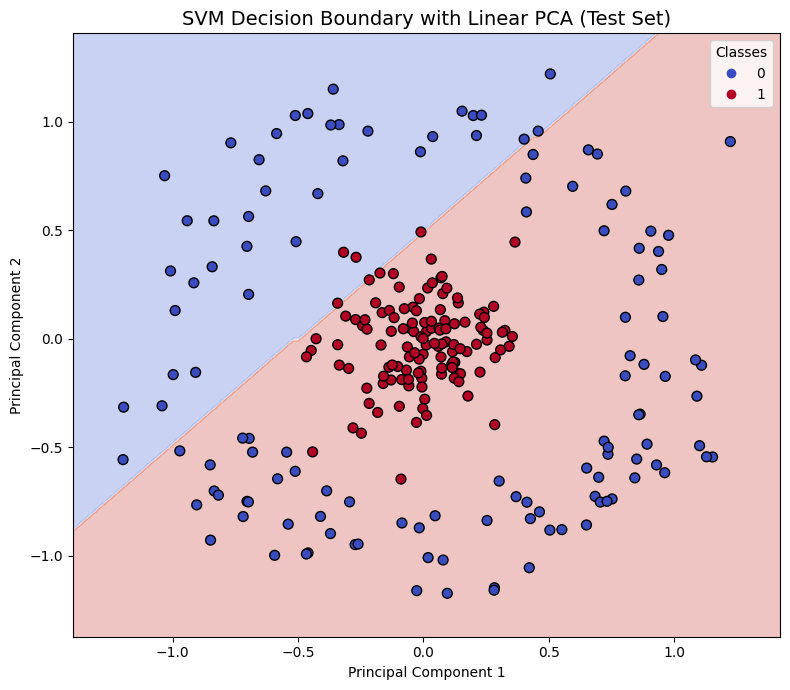

In [19]:
_ = pca_comparison_plot()

### Gaussian Kernel PCA

si sceglie di applicare un kernel gaussiano dopo aver notato la natura concentrica dei dati, i risultati sono migliori, con i dati linearmente separabili nello spazio delle Principal components e un accuratezza della classificazione SVM del 99%

In [20]:
from sklearn.decomposition import KernelPCA
gamma_values = [0.1, 0.5, 2, 5]

def kernel_pca_comparison_plot(gamma_values, kernel_type='rbf', degree_val=1):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, gamma_val in enumerate(gamma_values):
        ax = axes[i]
        # KPCA
        kpca = KernelPCA(kernel=kernel_type, gamma=gamma_val, degree=degree_val, n_components=2, random_state=0)
        kpca.fit(X_train)
        projection_train = kpca.transform(X_train)
        projection_test = kpca.transform(X_test)
        
        # SVM
        svm_model = SVC(kernel='linear', C=1)
        svm_model.fit(projection_train, y_train)
        y_pred = svm_model.predict(projection_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"Gamma={gamma_val} - Accuracy: {accuracy:.4f}")
        
        # meshgrid (serve per decision boundary)
        x_min, x_max = projection_test[:, 0].min() - 0.2, projection_test[:, 0].max() + 0.2
        y_min, y_max = projection_test[:, 1].min() - 0.2, projection_test[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        scatter = ax.scatter(projection_test[:, 0], projection_test[:, 1], c=y_test, edgecolor='k', marker='o', cmap='coolwarm', s=50)
        ax.set_title(f'Gamma = {gamma_val}', fontsize=14)
        ax.set_xlabel('Principal Component 1', fontsize=10)
        ax.set_ylabel('Principal Component 2', fontsize=10)
        
    legend = fig.legend(*scatter.legend_elements(), loc='lower center', title="Classes", bbox_to_anchor=(0.5, 0.02), ncol=2)
    plt.suptitle(f'SVM Decision Boundaries with {kernel_type.upper()} Kernel PCA (Test Set)', fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

Gamma=0.1 - Accuracy: 0.6160
Gamma=0.5 - Accuracy: 0.5760
Gamma=2 - Accuracy: 0.9920
Gamma=5 - Accuracy: 0.9880


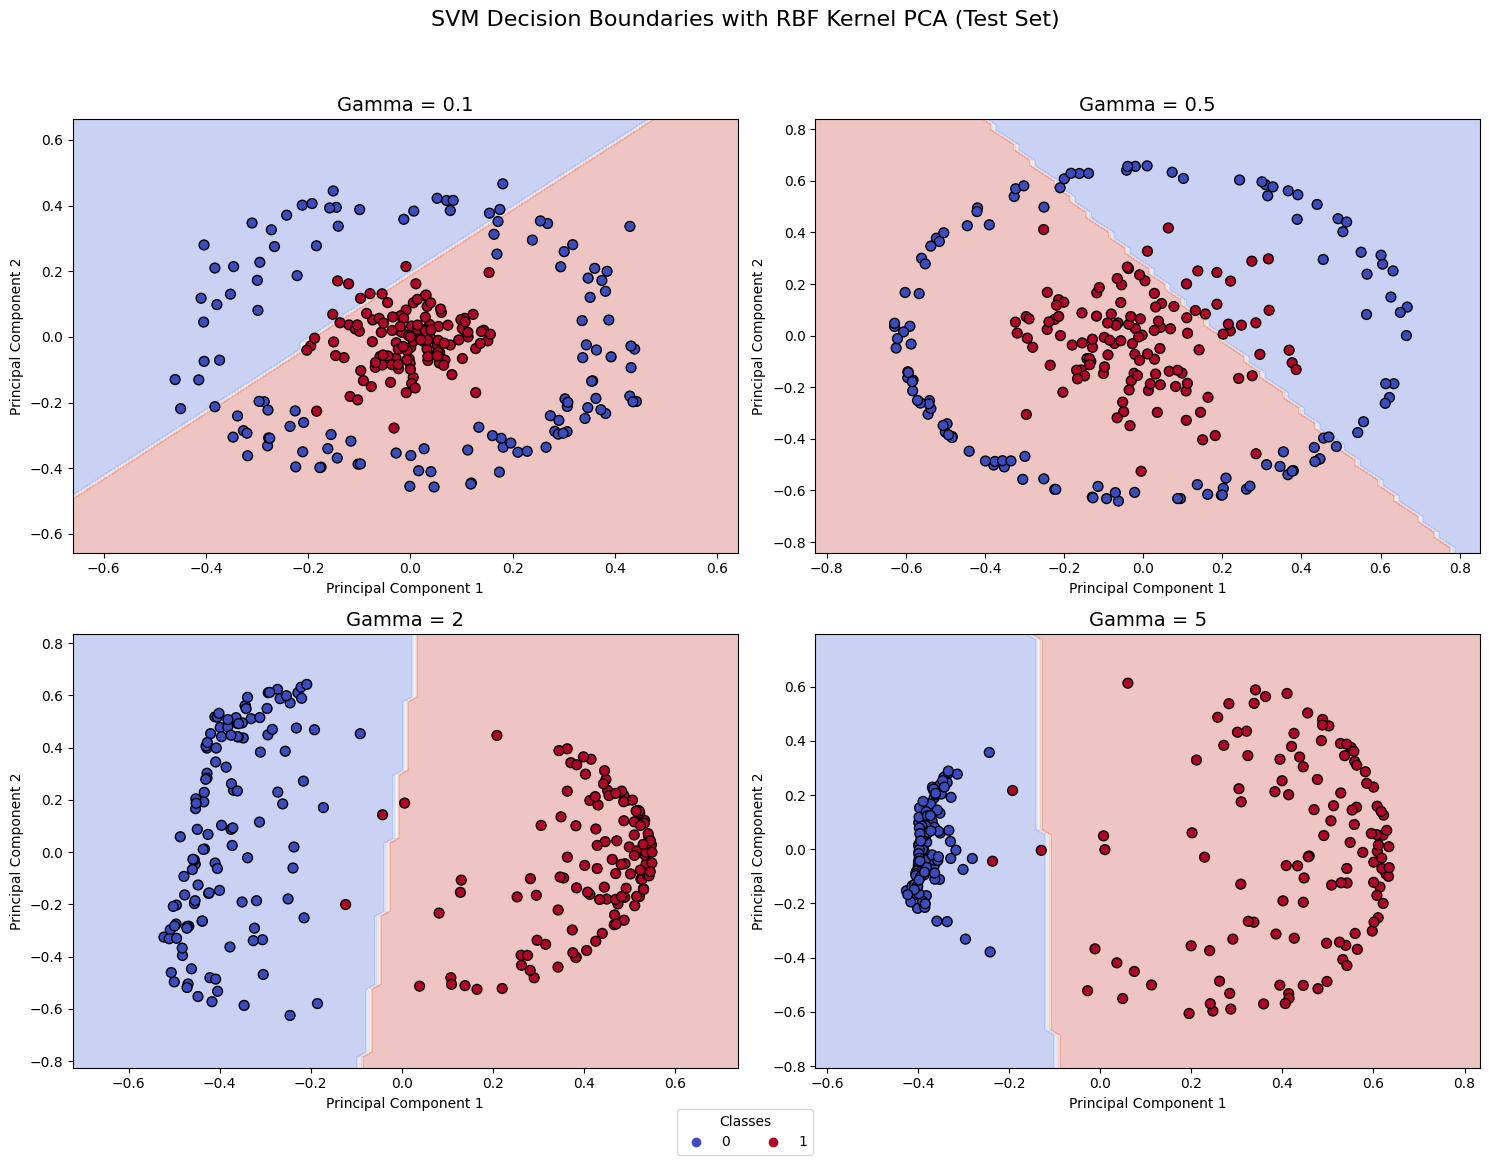

In [21]:
kernel_pca_comparison_plot(gamma_values, kernel_type='rbf')

best kernel PCA (gamma=2)

Gamma=2 - Accuracy: 0.9920


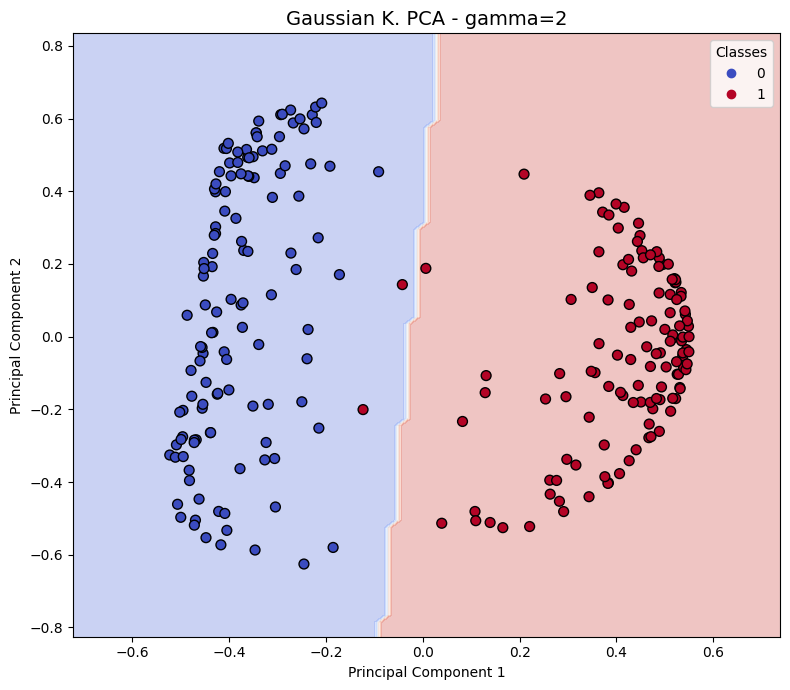

In [22]:
gamma_val = 2
kernel_type = 'rbf'
    
kpca = KernelPCA(kernel=kernel_type, gamma=gamma_val, n_components=2, random_state=0)
kpca.fit(X_train)
projection_train = kpca.transform(X_train)
projection_test = kpca.transform(X_test)
    
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(projection_train, y_train)
y_pred = svm_model.predict(projection_test)
    
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Gamma={gamma_val} - Accuracy: {accuracy:.4f}")
    
x_min, x_max = projection_test[:, 0].min() - 0.2, projection_test[:, 0].max() + 0.2
y_min, y_max = projection_test[:, 1].min() - 0.2, projection_test[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    
plt.figure(figsize=(8, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(projection_test[:, 0], projection_test[:, 1], c=y_test, edgecolor='k', marker='o', cmap='coolwarm', s=50)
    
plt.title('Gaussian K. PCA - gamma=2', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()

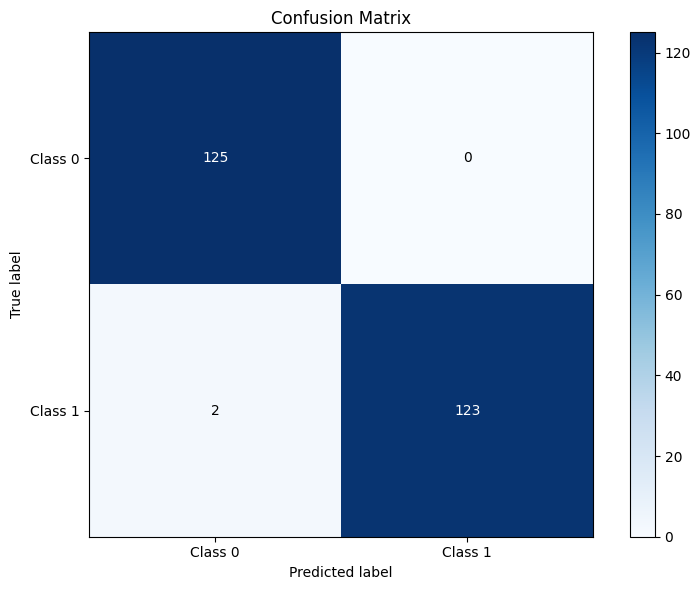

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
    title="Confusion Matrix",
    ylabel="True label",
    xlabel="Predicted label")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
     ax.text(j, i, format(cm[i, j], fmt),
          ha="center", va="center",
          color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()    

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

In [24]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000,
    n_features=10,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.2,
    flip_y=0.2,
    random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA porta già dei risultati con un accuratezza del 85% i kernel applicati non migliorano di molto le performance anche per la natura isotropica e non lineare dei dati generati da make classification

PCA - Accuracy: 0.8520


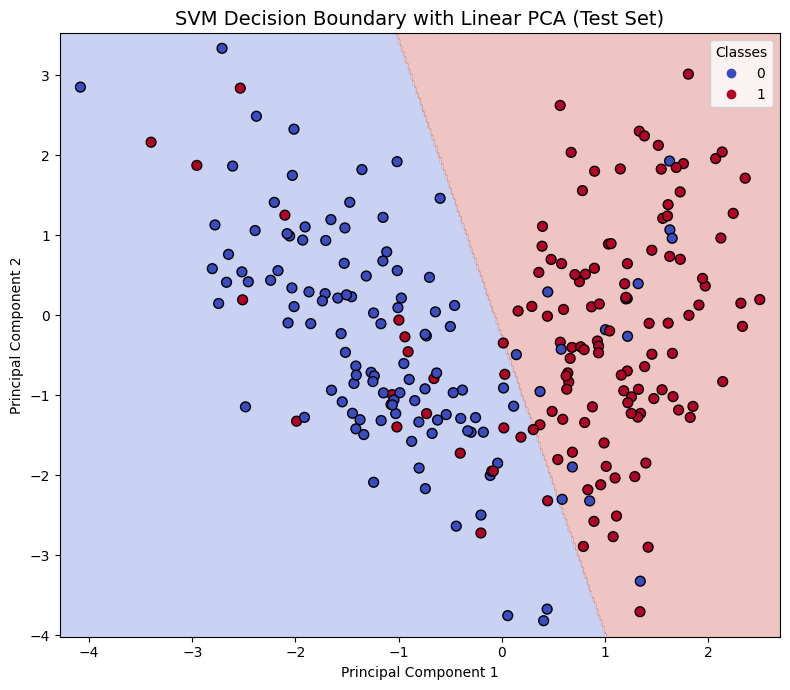

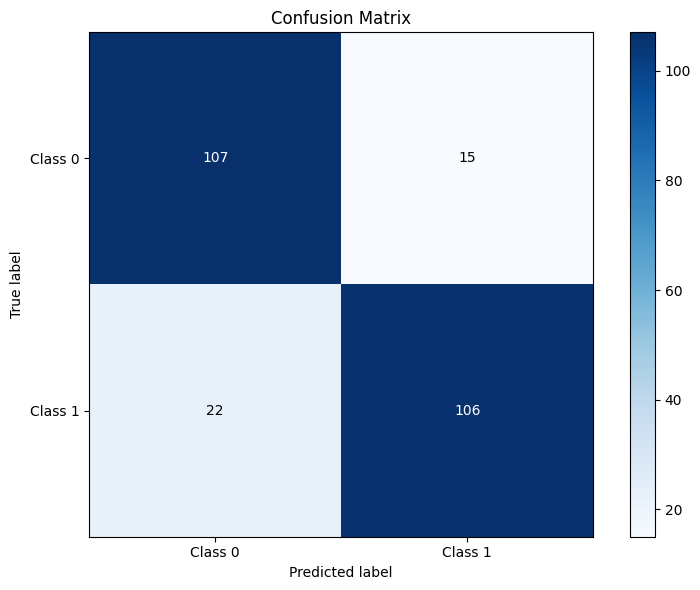

In [25]:
y_pred = pca_comparison_plot()

cm = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
    title="Confusion Matrix",
    ylabel="True label",
    xlabel="Predicted label")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
     ax.text(j, i, format(cm[i, j], fmt),
          ha="center", va="center",
          color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()    

### Try different kernels

Gamma=0.001 - Accuracy: 0.8560
Gamma=0.01 - Accuracy: 0.8520
Gamma=0.1 - Accuracy: 0.8440
Gamma=1 - Accuracy: 0.5440


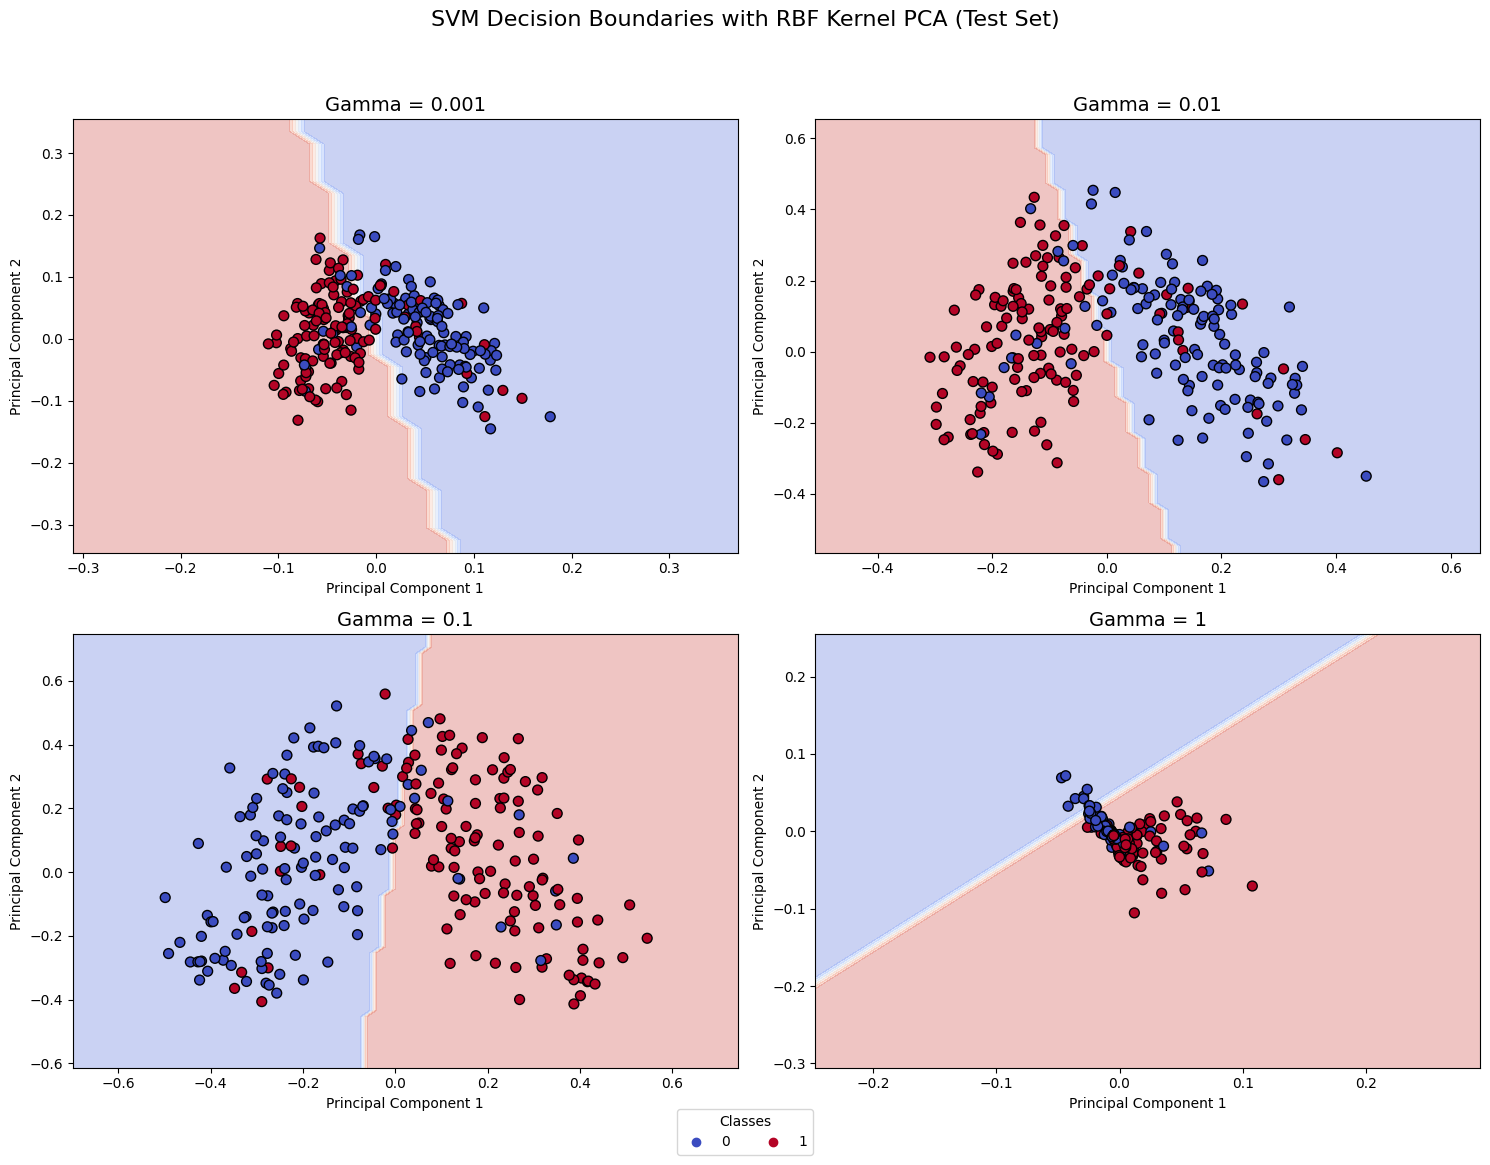

In [26]:
kernel_pca_comparison_plot(gamma_values=[0.001, 0.01, 0.1, 1], kernel_type='rbf')

Gamma=0.01 - Accuracy: 0.8560


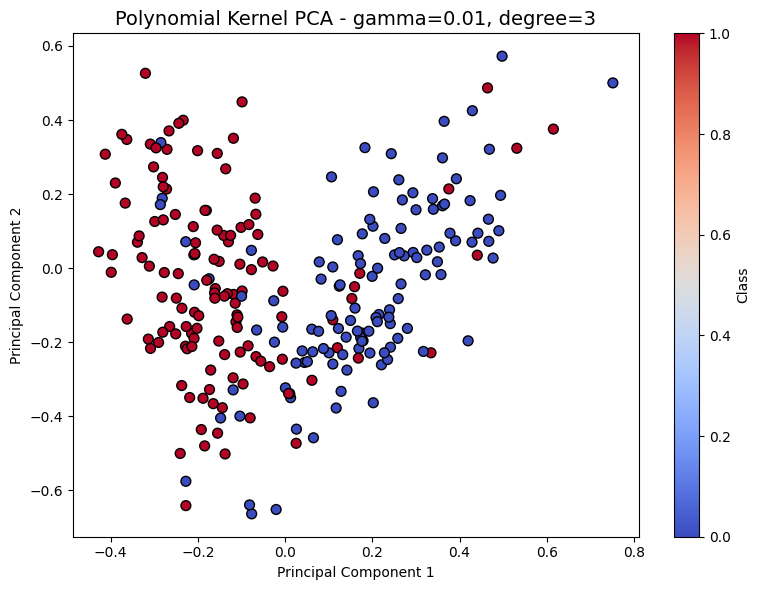

In [27]:
gamma_val = 0.01
kernel_type = 'poly'
degree_val = 3

kpca = KernelPCA(
    kernel=kernel_type, 
    gamma=gamma_val, 
    degree=degree_val, 
    n_components=4,
    random_state=0
)

kpca.fit(X_train)
projection_train = kpca.transform(X_train)
projection_test = kpca.transform(X_test)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(projection_train, y_train)
y_pred = svm_model.predict(projection_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Gamma={gamma_val} - Accuracy: {accuracy:.4f}")
plt.figure(figsize=(8, 6))
plt.scatter(projection_test[:, 0], projection_test[:, 1], 
           c=y_test, cmap='coolwarm', edgecolor='k', s=50)
plt.title(f'Polynomial Kernel PCA - gamma={gamma_val}, degree={degree_val}', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()

Gamma=0.01 - Accuracy: 0.8520
Gamma=0.1 - Accuracy: 0.8600
Gamma=2 - Accuracy: 0.8640
Gamma=10 - Accuracy: 0.8600


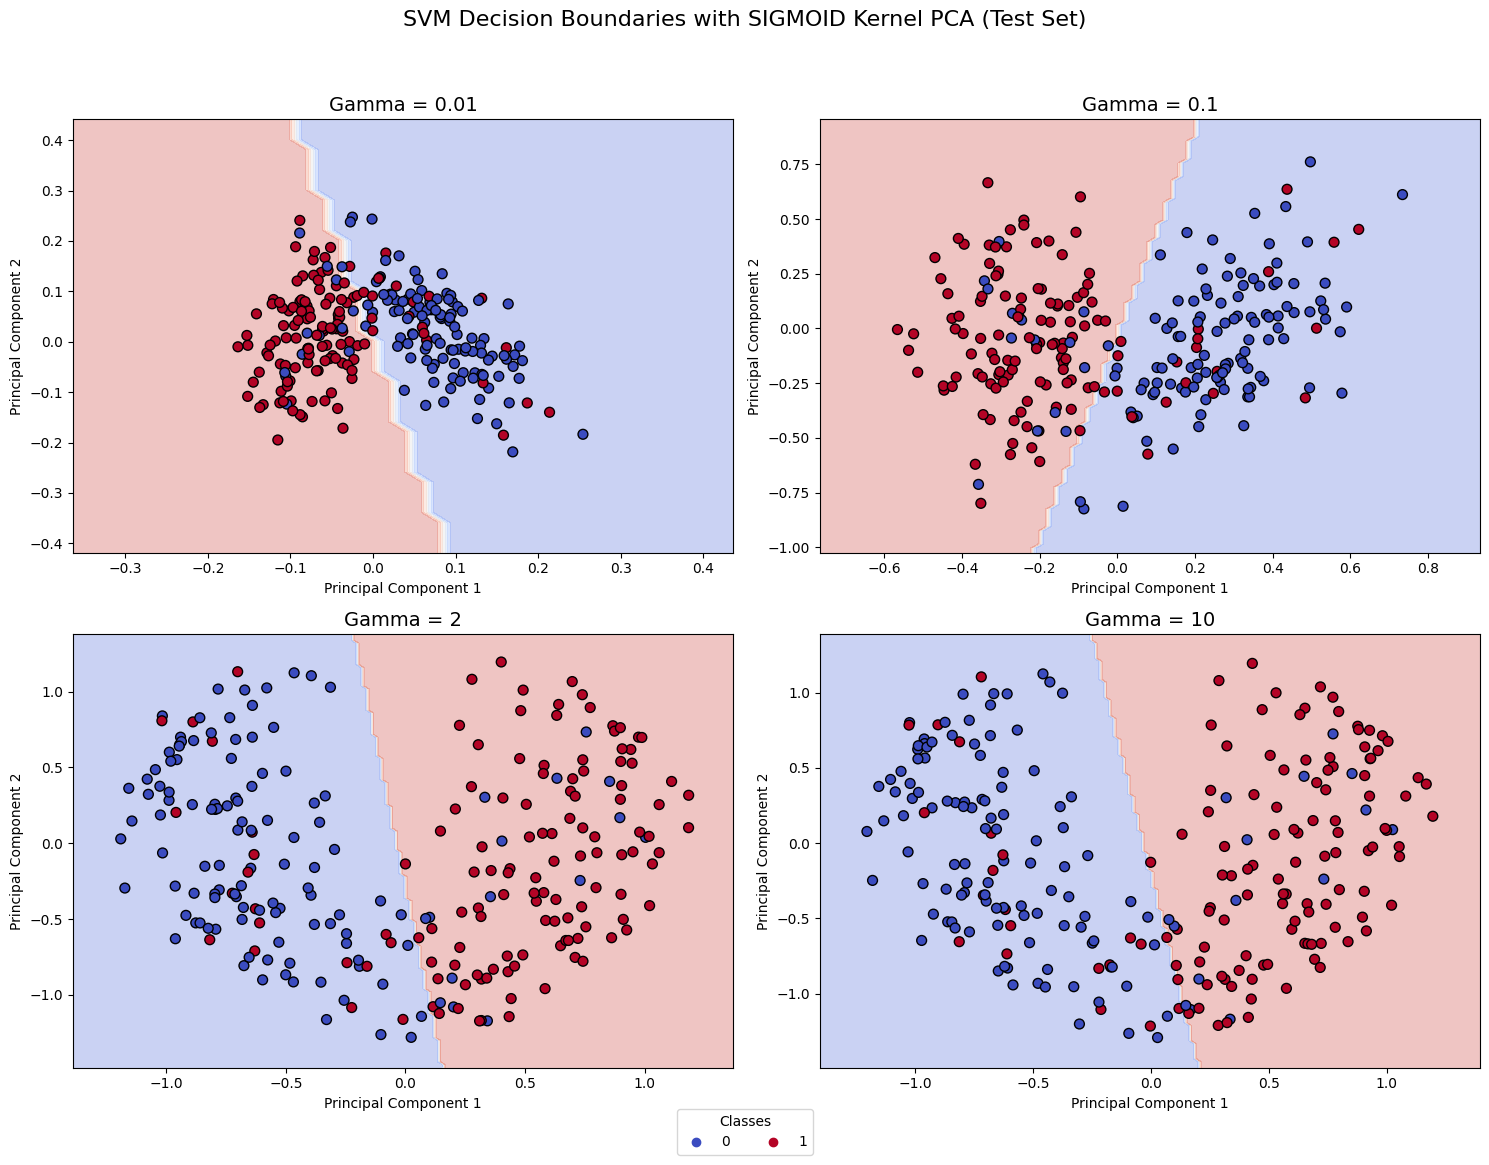

In [28]:
kernel_pca_comparison_plot(gamma_values = [0.01, 0.1, 2, 10], kernel_type='sigmoid')